In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data 
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data
fifa.csv  states_all.csv  StudentsPerformance.csv  youtube.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
original_data = pd.read_csv("states_all.csv", index_col=0)
original_data.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,,,,
1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [7]:
data=original_data.copy()
data.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,,,,
1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


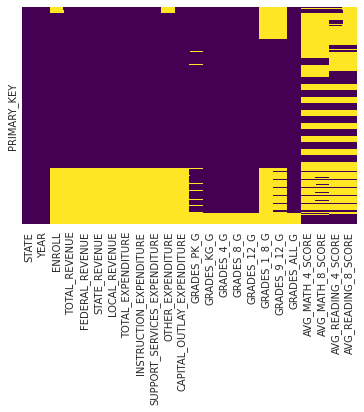

In [11]:
sns.heatmap(original_data.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Sarı olanlar null
plt.show()

In [0]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
for col in fill_list:
    data.loc[:, col].fillna(data.loc[:, col].interpolate(), inplace=True)

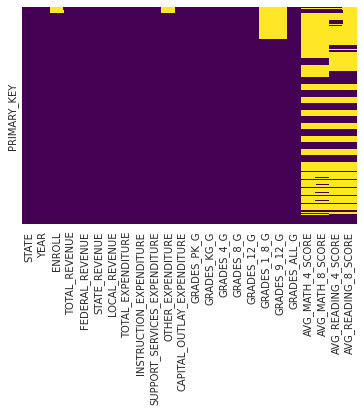

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Sarı olanlar null
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1715 entries, 1992_ALABAMA to 2019_WYOMING
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1715 non-null   object 
 1   YEAR                          1715 non-null   int64  
 2   ENROLL                        1664 non-null   float64
 3   TOTAL_REVENUE                 1715 non-null   float64
 4   FEDERAL_REVENUE               1715 non-null   float64
 5   STATE_REVENUE                 1715 non-null   float64
 6   LOCAL_REVENUE                 1715 non-null   float64
 7   TOTAL_EXPENDITURE             1715 non-null   float64
 8   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 9   SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 10  OTHER_EXPENDITURE             1664 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 12  GRADES_PK_G                   1715 non-null   fl

In [0]:
data['WeightedAvgScore']=(data['AVG_MATH_4_SCORE']*data['AVG_MATH_4_SCORE'].count()+data['AVG_READING_4_SCORE']*data['AVG_READING_4_SCORE'].count()+data['AVG_MATH_8_SCORE']*data['AVG_MATH_8_SCORE'].count()+data['AVG_READING_8_SCORE']*data['AVG_READING_8_SCORE'].count())/data['AVG_READING_4_SCORE'].count()+data['AVG_READING_8_SCORE'].count()+data['AVG_MATH_4_SCORE'].count()+data['AVG_MATH_8_SCORE'].count()

In [21]:
data

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WeightedAvgScore
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,,,,,
1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,NaN
1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,NaN
1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,NaN
1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,NaN
1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019_VIRGINIA,VIRGINIA,2019,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,671.0,7469.0,7537.0,7086.0,6405.0,58998.0,27361.0,94258.0,247.0,287.0,224.0,262.0,2660.035385
2019_WASHINGTON,WASHINGTON,2019,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,671.0,7469.0,7537.0,7086.0,6405.0,58998.0,27361.0,94258.0,240.0,286.0,220.0,266.0,2652.483077
2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,671.0,7469.0,7537.0,7086.0,6405.0,58998.0,27361.0,94258.0,231.0,272.0,213.0,256.0,2616.047692


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1715 entries, 1992_ALABAMA to 2019_WYOMING
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1715 non-null   object 
 1   YEAR                          1715 non-null   int64  
 2   ENROLL                        1664 non-null   float64
 3   TOTAL_REVENUE                 1715 non-null   float64
 4   FEDERAL_REVENUE               1715 non-null   float64
 5   STATE_REVENUE                 1715 non-null   float64
 6   LOCAL_REVENUE                 1715 non-null   float64
 7   TOTAL_EXPENDITURE             1715 non-null   float64
 8   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 9   SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 10  OTHER_EXPENDITURE             1664 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 12  GRADES_PK_G                   1715 non-null   fl

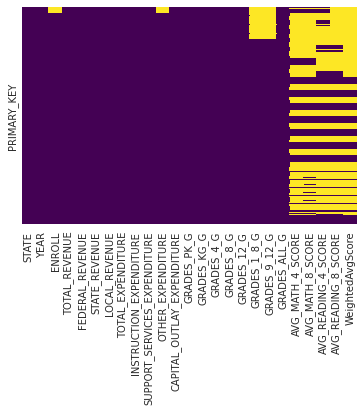

In [23]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Boşluklar var ama hepsini gidermem için avg value atmam lazım o da datayı bozar diye düşündüm
plt.show()

In [28]:
dataDen=data.copy() # Bu noktadan sonra geri dönmek isteyebilirim diye Deneme dataframe i oluşturmak istedim
dataDen.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WeightedAvgScore
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,,,,,
1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,NaN
1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,NaN
1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,NaN
1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,NaN
1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN


In [0]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G","WeightedAvgScore"]
years = dataDen["YEAR"].unique()
for col in fill_list:
    for year in years:
        dataDen.loc[dataDen["YEAR"] == year, col].fillna(dataDen[dataDen["YEAR"] == year][col].mean(), inplace=True)

In [31]:
dataDen.info()  # Yıllar kendi içinde boş olduğu için yılları kendi ortalamalarıyla doldurmaya çalıştığımda da dolmuyor o yüzden artık duruyorum :D

<class 'pandas.core.frame.DataFrame'>
Index: 1715 entries, 1992_ALABAMA to 2019_WYOMING
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1715 non-null   object 
 1   YEAR                          1715 non-null   int64  
 2   ENROLL                        1664 non-null   float64
 3   TOTAL_REVENUE                 1715 non-null   float64
 4   FEDERAL_REVENUE               1715 non-null   float64
 5   STATE_REVENUE                 1715 non-null   float64
 6   LOCAL_REVENUE                 1715 non-null   float64
 7   TOTAL_EXPENDITURE             1715 non-null   float64
 8   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 9   SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 10  OTHER_EXPENDITURE             1664 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 12  GRADES_PK_G                   1715 non-null   fl

In [39]:
correlasyonData = dataDen.iloc[:, lambda dataDen: [7,8,9,10,11,24]] #Entresan bi özellik buldum denedim çalıştı :D

correlasyonData.corr()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,WeightedAvgScore
TOTAL_EXPENDITURE,1.000000,0.992060,0.993820,0.950573,0.928459,-0.002565
INSTRUCTION_EXPENDITURE,0.992060,1.000000,0.978900,0.917894,0.893573,0.013290
SUPPORT_SERVICES_EXPENDITURE,0.993820,0.978900,1.000000,0.957542,0.913306,-0.000695
OTHER_EXPENDITURE,0.950573,0.917894,0.957542,1.000000,0.913302,-0.060764
CAPITAL_OUTLAY_EXPENDITURE,0.928459,0.893573,0.913306,0.913302,1.000000,-0.072376
WeightedAvgScore,-0.002565,0.013290,-0.000695,-0.060764,-0.072376,1.000000


Instruction Expenditure corelasyonu yüksek diğerlerine göre

In [0]:
correlasyonData=correlasyonData.dropna()

In [48]:
correlasyonData.info() #na leri atınca elimizde 478 satır kaldı burası mantıklı mı datanın çoğunluğunu kaybettik tartışılabilir.

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 2003_ALABAMA to 2019_WYOMING
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TOTAL_EXPENDITURE             478 non-null    float64
 1   INSTRUCTION_EXPENDITURE       478 non-null    float64
 2   SUPPORT_SERVICES_EXPENDITURE  478 non-null    float64
 3   OTHER_EXPENDITURE             478 non-null    float64
 4   CAPITAL_OUTLAY_EXPENDITURE    478 non-null    float64
 5   WeightedAvgScore              478 non-null    float64
dtypes: float64(6)
memory usage: 46.1+ KB


In [0]:
X = StandardScaler().fit_transform(correlasyonData)

Xt = X.T
Cx = np.cov(Xt)

In [44]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Özvektör {}: \n{}'.format(i + 1, eigvec_cov))
    print('Özdeğer  {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'Verikümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    eig_val_cov / sum(eig_val_cov)
)

Özvektör 1: 
[ 0.45574456  0.44690426  0.45384535  0.44436701  0.43466165 -0.01432075]
Özdeğer  1: 4.781145234429627
----------------------------------------
Özvektör 2: 
[-0.03124845 -0.0498613  -0.03290073  0.03411484  0.0506958  -0.99585192]
Özdeğer  2: 1.0084376858502406
----------------------------------------
Özvektör 3: 
[-0.21771584 -0.48528683 -0.24148324  0.1945188   0.7833321   0.08564819]
Özdeğer  3: 0.13350948658868142
----------------------------------------
Özvektör 4: 
[ 0.13425681  0.35991909 -0.10962541 -0.80921061  0.43011235 -0.02443716]
Özdeğer  4: 0.07713854784916979
----------------------------------------
Özvektör 5: 
[ 0.85166735 -0.40744517 -0.31046954 -0.05020929 -0.09864566 -0.00280831]
Özdeğer  5: 0.0004516451362021029
----------------------------------------
Özvektör 6: 
[-0.02362368  0.51646278 -0.79133982  0.32587387 -0.01274434  0.01154128]
Özdeğer  6: 0.011896016498280952
----------------------------------------
Verikümesindeki toplam varyans yüzdesi E

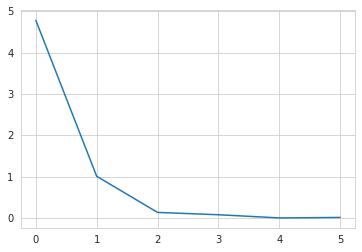

[4.78114523e+00 1.00843769e+00 1.33509487e-01 7.71385478e-02
 4.51645136e-04 1.18960165e-02]


In [47]:
plt.plot(eig_val_cov) #3. Soru Cevap 4.78114523e+00
plt.show()

print(eig_val_cov)

In [46]:
sklearn_pca = PCA(n_components=4) # 4.Soru Cevap 0.79519047
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

print(
    'Veri kümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    sklearn_pca.explained_variance_ratio_
)

Veri kümesindeki toplam varyans yüzdesi Elle hesaplanan bileşen.
 [0.79519047 0.16772133 0.02220503 0.01282953]


5. Soru için bence ilk pca değişkeninin 0.80 e yakın varyansı olması çalışmak için yeterlidir. 1 e yakın olduğu için